It is my first independent project and I will be glad to hear your comments on its content and technical implementation.

# Do redhead people live shorter lives?

<img src="https://gingerparrot.co.uk/wp/wp-content/uploads/2018/06/group-of-redheads.jpeg" width="800"> 

I hope the headline of my first project is provocative enough to catch your attention.

Being a woman with red hair, during my 29-years long life I have heard millions of jokes, myths and  precautions concerning myself and my health. Historically, red hair aroused the interest and, unfortunately, hateful biases. If in the mediveal times redhair women were automatically accused of being witches or soulless persons, in the XXI century redhair people are said to be more exposed to skin cancer or allergy, more pain sensitive and that redhair people will "go the way of the dinosaur" due to climate change. Even my tattoo master warned me that I might have some problems with tattoo because of my "different blood".
Some of these statements are statistically proved facts and some are just myths.

But do these aspects about redheads' health affect their life expectancy? Does higher risk of cancer and other diseases result in shorter average length of life?

Inspired by 2 sources:
- the article about correlation between health status and degree of hair redness: [Health status by gender, hair color, and eye color: Red-haired women are the most divergent](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5746253/);
- the DataCamp project designed by Madeleine Bonsma-Fisher: [Do Left-handed People Really Die Young?](https://learn.datacamp.com/projects/479)

I decided to explore this issue.
In this project I used 2 datasets:
- death distribution data for 2019 in Czech Republic [website of Czech Statistical Office](https://www.czso.cz/csu/czso/demographic-yearbook-of-the-czech-republic-2019);
- data collected for a survey on the RhD factor in relation to human health (answers for questionnaire were obtained from Czechs and Slovaks between 28/4/2014 and 12/09/2016, [dataset available here](https://figshare.com/s/6a02dd5cec0f90b69db9)) 

DISCLAIMER: Even though the results seem to be very promising for me personally, I ask you not to take them too seriously because, as some of you might know, according to statistics the average longevity of swiss students in 19th century was 20.2 years (you can find this in the article: [The most dangerous profession: A note on nonsampling error.](https://psycnet.apa.org/doiLanding?doi=10.1037%2F1082-989X.4.3.250)).

# 1. DEATH  DISTRIBUTION  DATASET

The dataset with information about redhead people was created based on answers of people living in Czech Republic and Slovenia. Also, two out of three authors of the mentioned article with statistical analysis of redhead people health are from Czech Republic. Due to these reasons I decided to use czech official statistics of deaths in 2019 as it is the latest available demographic data and the most geographically suitable.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_1 = 'https://raw.githubusercontent.com/ElinaAizenberg/Projects/main/13006720rf03.csv'
deaths = pd.read_csv(file_1, sep = ';').dropna()

deaths.Age = pd.to_numeric(deaths.Age, errors='coerce')
deaths.Males = pd.to_numeric(deaths.Males, errors='coerce')
deaths.at[106, 'Age'] = 106
deaths.Males = deaths.Males.replace(np.nan, 0)
deaths = deaths.rename(columns = {'Age':'Age_in_2019'})

deaths.head()

,Age_in_2019,Total,Males,Females
0,0.0,288.0,165.0,123.0
1,1.0,25.0,12.0,13.0
2,2.0,14.0,9.0,5.0
3,3.0,13.0,7.0,6.0
4,4.0,10.0,5.0,5.0


The key result of brief analysis is that female czechs live on average by almost 7 years longer than males. It can be easily observed from the second plot.

Average life expectancy of people who died in 2019 in Czech Republic is 75.74 years

Average life expectancy of females is 79.18 years
Average life expectancy of males is 72.44 years


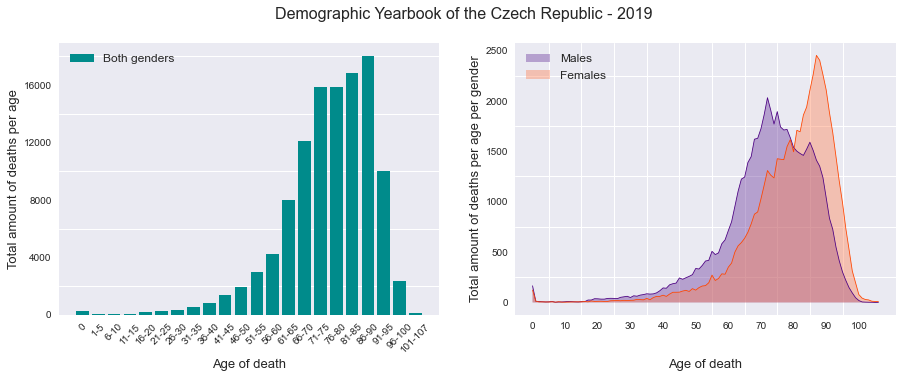

In [3]:
"----------------data preprocessing-----------------------------"
# As it's very inconvenient to visualize death distribution data with 1-year frequency, I decided to group it by 5 years
ranges = [[x+1, x+5] for x in range(0,107,5)]
ranges.pop()
ranges[-1] = [101,107]
total_deaths = [deaths.Total.loc[range[0]:range[1]].sum() for range in ranges]

# Newborns' deaths data is quite specific, so,I set it aside.
ranges[:0] = [[0]]
total_deaths[:0] = [deaths.Total.loc[0]]

# Labels will be used for plots
labels = ['-'.join([str(elem) for elem in range]) for range in ranges[1:]]
labels[:0] = ['0']

"----------------creating plots-----------------------------"

fig = plt.figure(figsize = (15,5))
plt.style.use('seaborn')
fig.suptitle('Demographic Yearbook of the Czech Republic - 2019', fontsize=16)


spec = fig.add_gridspec(1, 2)
f_ax1 = fig.add_subplot(spec[0, 0])
f_ax2 = fig.add_subplot(spec[0, 1])

"----------------total deaths plot-----------------------------"

major_ticks_y = np.arange(0, 24000, 4000)
minor_ticks_y = np.arange(0, 24000, 2000)

major_ticks_x = np.arange(0, 101, 10)
minor_ticks_x = np.arange(0, 101, 5)

f_ax1.set_yticks(major_ticks_y)
f_ax1.set_yticks(minor_ticks_y, minor=True)


f_ax1.grid(which='both')
f_ax1.bar(labels, total_deaths, color = 'darkcyan', label='Both genders')
f_ax1.set_xticklabels(labels, rotation=45)
f_ax1.set_xlabel('Age of death', fontsize=13)
f_ax1.set_ylabel('Total amount of deaths per age', fontsize=13)
f_ax1.legend(fontsize = 12, loc = 'upper left')

"----------------gender deaths plot-----------------------------"

total_deaths_female = [deaths.Females.loc[range[0]:range[1]].sum() for range in ranges[1:]]
total_deaths_female[:0] = [deaths.Females.loc[0]]

total_deaths_male = [deaths.Males.loc[range[0]:range[1]].sum() for range in ranges[1:]]
total_deaths_male[:0] = [deaths.Males.loc[0]]

major_ticks_y_2 = np.arange(0, 3000, 500)
minor_ticks_y_2 = np.arange(0, 3000, 250)

f_ax2.set_yticks(major_ticks_y_2)
f_ax2.set_yticks(minor_ticks_y_2, minor=True)

major_ticks_x_2 = np.arange(0, 100, 10)
minor_ticks_x_2 = np.arange(0, 100, 5)

f_ax2.set_xticks(major_ticks_x_2)
f_ax2.set_xticks(minor_ticks_x_2, minor=True)

f_ax2.grid(which='both')

# Line plot
f_ax2.plot(deaths.Age_in_2019, deaths.Males,color = 'indigo', linewidth = 0.8)
f_ax2.plot(deaths.Age_in_2019, deaths.Females,color = 'orangered', linewidth = 0.8)
f_ax2.fill_between(deaths.Age_in_2019, deaths.Males, 0,  facecolor = 'rebeccapurple', label='Males', alpha = 0.4)
f_ax2.fill_between(deaths.Age_in_2019, deaths.Females, 0,  facecolor = 'coral', label='Females', alpha = 0.4)

f_ax2.set_xticks(np.arange(0, 101, 10))
f_ax2.set_xlabel('Age of death', fontsize=13)
f_ax2.set_ylabel('Total amount of deaths per age per gender', fontsize=13)
f_ax2.legend(fontsize = 12, loc = 'upper left')

fig.align_labels()



"----------------average life expectancy-----------------------------"

czech_av_age = np.sum(deaths.apply(lambda row: (row.Total/ deaths.Total.sum())* row.Age_in_2019, axis=1))
czech_av_age_f = np.sum(deaths.apply(lambda row: (row.Females/ deaths.Females.sum())* row.Age_in_2019, axis=1))
czech_av_age_m = np.sum(deaths.apply(lambda row: (row.Males/ deaths.Males.sum())* row.Age_in_2019, axis=1))

print("Average life expectancy of people who died in 2019 in Czech Republic is {:.2f} years". format(czech_av_age))
print()
print("Average life expectancy of females is {:.2f} years". format(czech_av_age_f))
print("Average life expectancy of males is {:.2f} years". format(czech_av_age_m))

plt.show()

# 2. Explore redhead people dataset

In [4]:
file2 = 'https://raw.githubusercontent.com/ElinaAizenberg/Projects/main/rawDataRedheads2017.csv'
redhead = pd.read_csv(file2, sep = ';',engine='python', usecols = ['sex', 'BornY', 'hairRed','cancer'])

# drop rows with NaN values in age, sex and hair columns
redhead = redhead.dropna(subset = ['sex', 'BornY', 'hairRed'])

The dataset is quite impressive: 278 features and 6889 observations. Although, it might be very interesting to dig deeper into data, currently, it is not the task. So, I have to reduce it significantly and use only columns with information about age, sex, degree of hair redness and level of cancer problems intensity.

**Key insights:**
- amount of respondents per hair color group decreases along with the raise of hair redness degree;

- at the same time the percentage of women in every hair color group is higher than men and increases steadily from the 1st group (not red) to the 6th group (red). In the latest group the percentage of women achieves the maximum - 77%;

- the intesity level of cancer problems seems assciated with hair redness and gender: in 1-5 groups intensity level gradually increases. Also in the last 2 groups with the highest degree of hair redness, you may notice significant difference between genders' lines. It is mentioned in the [article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5746253/) that red-haired women are prone to higher number of cancers than red-haired men.  

- during 50 years in the XXth century the percentage of people with red hair fluctuated insignificantly and slightly decreased, while the ratio between not red hair (1-2 groups) and slightly red hair(3-4 groups) changed dramatically: approximately in the middle of 60th the rate of not red-haired people surpassed the rate of slightly red-haired people and continued to rise.

**Technical comment:**
- In original dataset column with data about degree of hair redness contains values from 1 to 6: 1 = 'hair not at all red' and 6 = 'completely red'. In order to speed up calculations I decided to group hair redness groups by 2 values: 1-2 = 'not red', 3-4 = 'slightly red', 5-6 = 'red'. These 3 categories will be used in Bayesian part of the project.


In [1]:
"----------------creating plots-----------------------------"

fig2 = plt.figure(figsize = (15,5))
plt.style.use('seaborn')

spec = fig.add_gridspec(1, 2)
f2_ax1 = fig2.add_subplot(spec[0, 0])
f2_ax2 = fig2.add_subplot(spec[0, 1])


# Stacked bar plot
red_category = np.sort(np.array(redhead.hairRed.unique().astype('float')))
red_group = [redhead.loc[redhead.hairRed == x,'hairRed'].count() for x in red_category]

splot = sns.barplot(x=red_category,y=red_group, ax = f2_ax1,color = 'rebeccapurple')
                
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
    
"----------------creating horizontal bar charts-----------------------------"

sex_category = np.sort(np.array(redhead.sex.unique().astype('float')))

results_hair = {
    'Not red - 1': [100 * redhead.loc[(redhead.sex == x) & (redhead.hairRed == 1.0),'hairRed'].count() / redhead.loc[(redhead.hairRed == 1.0),'hairRed'].count() for x in sex_category],
    'Not red - 2': [100 * redhead.loc[(redhead.sex == x) & (redhead.hairRed == 2.0),'hairRed'].count() / redhead.loc[(redhead.hairRed == 2.0),'hairRed'].count() for x in sex_category],
   'Slightly red - 3': [100 * redhead.loc[(redhead.sex == x) & (redhead.hairRed == 3.0),'hairRed'].count() / redhead.loc[(redhead.hairRed == 3.0),'hairRed'].count() for x in sex_category],
   'Slightly red - 4': [100 * redhead.loc[(redhead.sex == x) & (redhead.hairRed == 4.0),'hairRed'].count() / redhead.loc[(redhead.hairRed == 4.0),'hairRed'].count() for x in sex_category],
   'Very red - 5': [100 * redhead.loc[(redhead.sex == x) & (redhead.hairRed == 5.0),'hairRed'].count() / redhead.loc[(redhead.hairRed == 5.0),'hairRed'].count() for x in sex_category],
   'Very red - 6': [100 * redhead.loc[(redhead.sex == x) & (redhead.hairRed == 6.0),'hairRed'].count() / redhead.loc[(redhead.hairRed == 6.0),'hairRed'].count() for x in sex_category]
}

def survey(results, category_names, fig, ax, cmap):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap(cmap)(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = fig, ax
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results_hair, sex_category, fig2, f2_ax2, 'RdBu')

# Customization of plots
f2_ax1.set_title('Amount of respondents per degree of hair redness', fontsize=13)
f2_ax1.set_xticklabels(['Not red - 1','Not red - 2','Slightly red - 3','Slightly red - 4', 'Very red - 5','Very red - 6'], rotation = 45)
f2_ax1.set_yticks(np.arange(0,2001,500))

f2_ax2.set_title('Percentage of males and females for every degree of hair redness', fontsize=13)
f2_ax2.legend(['Percentage of females in the group','Percentage of males in the group'], loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)


fig.align_labels()

plt.show()

NameError: name 'plt' is not defined

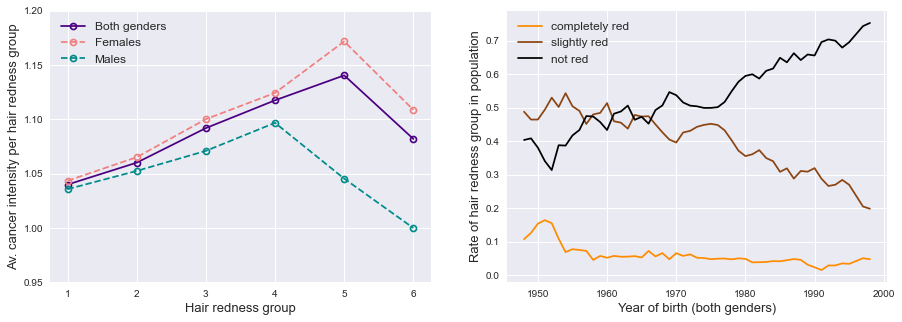

In [6]:
"----------------creating plots-----------------------------"

fig3 = plt.figure(figsize = (15,5))
plt.style.use('seaborn')

spec = fig.add_gridspec(1, 2)
f3_ax1 = fig3.add_subplot(spec[0, 0])
f3_ax2 = fig3.add_subplot(spec[0, 1])

"----------------cancer intensity/hair group line plot-----------------------------"

f3_ax1.plot(redhead.loc[:,['cancer','hairRed']].groupby(by = 'hairRed').mean(),color = 'indigo', marker = 'o', mfc='none', markeredgewidth = 1.7, markersize = 6, linestyle = '-', label = 'Both genders')
f3_ax1.plot(redhead.loc[redhead.sex == 0, ['cancer','hairRed']].groupby(by = 'hairRed').mean(), color = 'lightcoral', marker = 'o', mfc='none', markeredgewidth = 1.7, markersize = 6, linestyle = '--', label = 'Females')
f3_ax1.plot(redhead.loc[redhead.sex == 1, ['cancer','hairRed']].groupby(by = 'hairRed').mean(), color = 'darkcyan', marker = 'o', mfc='none', markeredgewidth = 1.7, markersize = 6, linestyle = '--', label = 'Males')
f3_ax1.set_ylim([0.95,1.2])

f3_ax1.set_xlabel('Hair redness group', fontsize=13)
f3_ax1.set_ylabel('Av. cancer intensity per hair redness group', fontsize=13)
f3_ax1.legend(fontsize = 12, loc = 'upper left')

fig3.align_labels()

"----------------data preprocessing-----------------------------"

# Create a new column and replace 6 degrees of redness with 3 categories in original dataFrame
redhead['hairRed_c'] = redhead.hairRed.replace({1: 'not red', 2: 'not red', 3:'slightly red', 4:'slightly red', 5:'completely red', 6:'completely red'})
redhead.BornY = pd.to_datetime(redhead.BornY, format='%Y').dt.year

# Create a new Dataframe with grouped information about percentage of different red hair groups per year of birth
redhead_rates = pd.DataFrame()
redhead_rates['birth_year'] = redhead.BornY.unique()
redhead_rates = redhead_rates.sort_values(by = 'birth_year', ascending = True).reset_index(drop = True)

redhead_rates['com_r_rate'] = redhead_rates.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year)& (redhead['hairRed_c'] == 'completely red')].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year)].index), axis=1)
redhead_rates['sl_r_rate'] = redhead_rates.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year)& (redhead['hairRed_c'] == 'slightly red')].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year)].index), axis=1)
redhead_rates['not_r_rate'] = redhead_rates.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year)& (redhead['hairRed_c'] == 'not red')].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year)].index), axis=1)

# I exclude those years where rate of completely red people is 0, because it is obviously the result of small sampling.
# These years are from 1928 to 1944 (very few so old people participated in questionnaire) and 1996,1999 - 2005 (children).
redhead_rates = redhead_rates.loc[redhead_rates.com_r_rate > 0].reset_index(drop = True)
redhead_rates = redhead_rates.iloc[1:,:] #exclude 1945 year as anomaly

"----------------hair redness groups in time-----------------------------"


f3_ax2.plot(redhead_rates['birth_year'], redhead_rates['com_r_rate'].rolling(3).mean(), marker = 'x', color = 'darkorange', label = 'completely red')
f3_ax2.plot(redhead_rates['birth_year'], redhead_rates['sl_r_rate'].rolling(3).mean(), marker = 'x', color = 'saddlebrown', label = 'slightly red')
f3_ax2.plot(redhead_rates['birth_year'], redhead_rates['not_r_rate'].rolling(3).mean(), marker = 'x', color = 'black', label = 'not red')

f3_ax2.set_xlabel('Birth year (both sexes)')
f3_ax2.set_ylabel('Rate of completely redhead people')
f3_ax2.legend(fontsize = 12, loc = 'upper left')
f3_ax2.set_xlabel('Year of birth (both genders)', fontsize=13)
f3_ax2.set_ylabel('Rate of hair redness group in population', fontsize=13)

plt.show()

# 3. Apply Bayes' theorem

**Let's go briefly through the theory behind Bayes' Theorem.**

- We assume that event A occurred as a result of one of the hypothesis: B(1), B(2), ... , B(n).
When we do not know exactly which of the B-hypothesis was realized before event A, the probability of each B-hypothesis is called 'prior probability'.

*For example, we have 100 groups of people of different age. In every age group there are some amounts of people with red, slightly red and not red hair. The probability of a random person to be from any age group is the prior probability P(B1), ..., P(B100).*

- The next term to mention is 'conditional probability' or P(A given B). It is probablity of event A given that it happened as a result of particular hypothesis B(n) realization.

*For example, if we assume that a random person is from '45-years' age group, what is the probability that he or she has red hair (event A)? We know that among 45-years old people the percentage of red hair is, for instance, 8%. And it will be conditional probability of being redheaded given the age of 45 years.*

- The next term to mention is 'joint probability' or P(A, B). It is the probability that 2 or more events occurring at the same time. In our case joint probability of dependent events P(A, B(n)) = P(B(n)) * P(A given B(n)).

- Finally, we should  mention 'total probability rule'. This rule is usually expressed in formula:
P(A)= P(A given B1)* P(B1) + ... + P(A given B(n))* P(B(n)). Simply saying, total probability of event A is an overall probability of A considering all possible hypothesis B(1), ..., B(n) with known prior probabilities.

*Continuing our example, total probability of event A shows an overall probability of the fact that random person taken from a random age group will have red hair given the knowledge about redheaded people percentage in every age group.*


**What is the meaning of Bayes' Theorem?**

- Bayes' Theorem allows us to calculate vice versa probability: the probability of hypothesis B(n) given that event A has already happend. And it is called 'posterior probability'. In other words, this theorem revaluates probability of hypothesis B(n) considering newly discovered circustances.
The formula is: P(B(n) given A) = P(B(n)) * P(A given B(n)) / P(A)

*Speaking about redhead people, we use Bayes' Theorem to evaluate probability that a random person with red hair is from a certain age group.*

**How to calucate average life expectancy using Bayes' Theorem?**

After calcuting posterior probabilities of a random person with red, slightly red or not red hair being from all age groups, we can weight the probability distribution by age and sum it. Thus, we will get average life expectancy of people with different hair color. 

In [7]:
# I merge 2 dataFrames with rates of hair redness per age in 2019 and amount of deaths per age in 2019
redhead_rates['Age_in_2019'] = 2019 - redhead_rates['birth_year']
deaths = deaths.merge(redhead_rates, how = 'left', on = 'Age_in_2019')


In [8]:
# Since there are not enough data about redhair people (not for every age of those who died in 2019),
# I extrapolate the data of hair rates to earlier and later years, using rolling mean with 20-years window
# I suppose such window catches the trend and not only short-term average.
deaths = deaths.fillna(deaths.iloc[::-1].rolling(20, min_periods=0).mean())
deaths = deaths.fillna(deaths.rolling(30, min_periods=0).mean())
deaths = deaths.dropna()

In [9]:
# probability of dying at certain age A, the sum of probabilities is 1.0
# event A - dying at certain age
deaths['P(A)'] = deaths['Total']/deaths['Total'].sum() #sum should be equal 1.0 - check

# the total probability of a person died in 2019 to be redheaded
Prob_redhead = np.sum(deaths['P(A)'] * deaths['com_r_rate'])

# the probability that a redhead pearson died at the certain age A in 2019 
deaths['P(A|Red)'] = (deaths['P(A)'] * deaths['com_r_rate'])/Prob_redhead #sum of the 'P(A|Red)'-column should be equal 1.0 - check

avg_age_red = np.sum(deaths['Age_in_2019'] * deaths['P(A|Red)'])
print('Average life expectancy of red hair people is {:.2f} years'. format(avg_age_red))

# repeat the same calculations for people with slightly red and not red hair.

#SLIGHTLY red hair
Prob_sl_redhead = np.sum(deaths['P(A)'] * deaths['sl_r_rate'])
deaths['P(A|Slight Red)'] = (deaths['P(A)'] * deaths['sl_r_rate'])/Prob_sl_redhead #sum of the 'P(A|Slight Red)'-column should be equal 1.0 - check

avg_age_sl_red = np.sum(deaths['Age_in_2019'] * deaths['P(A|Slight Red)'])
print('Average life expectancy of slightly red hair people is {:.2f} years'. format(avg_age_sl_red))

#NOT red hair
Prob_not_redhead = np.sum(deaths['P(A)'] * deaths['not_r_rate'])
deaths['P(A|Not Red)'] = (deaths['P(A)'] * deaths['not_r_rate'])/Prob_not_redhead #sum of the 'P(A|Not Red)'-column should be equal 1.0 - check

avg_age_not_red = np.sum(deaths['Age_in_2019'] * deaths['P(A|Not Red)'])
print('Average life expectancy of NOT red hair people is {:.2f} years'. format(avg_age_not_red))


Average life expectancy of red hair people is 77.61 years
Average life expectancy of slightly red hair people is 76.53 years
Average life expectancy of NOT red hair people is 74.92 years


**3.1 Apply Bayes' theorem per gender - females**

According to death distribution dataset female czechs live several years longer than male. On the other hand, we observed from readhead people dataset, that females with red hair are exposed to cancer problems more serious. Therefore, I decided to repeate all steps to calculate average life expectancy separetly for males and females with different degree of hair redness.

In [10]:
# FEMALES: Create a new Dataframe with grouped information about percentage of different red hair groups per year of birth
redhead_rates_f = pd.DataFrame()
redhead_rates_f['birth_year'] = redhead.loc[(redhead['sex'] == 0)].BornY.unique()

redhead_rates_f = redhead_rates_f.sort_values(by = 'birth_year', ascending = True).reset_index(drop = True)

redhead_rates_f['com_r_rate'] = redhead_rates_f.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['hairRed_c'] == 'completely red') & (redhead['sex'] == 0)].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['sex'] == 0)].index), axis=1)

redhead_rates_f['sl_r_rate'] = redhead_rates_f.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year)& (redhead['hairRed_c'] == 'slightly red') & (redhead['sex'] == 0)].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['sex'] == 0)].index), axis=1)
redhead_rates_f['not_r_rate'] = redhead_rates_f.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year)& (redhead['hairRed_c'] == 'not red') & (redhead['sex'] == 0)].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['sex'] == 0)].index), axis=1)

# I exclude those years where rate of completely red people is 0, because it is obviously the result of small sampling.
# These years are from 1928 to 1944 (very few so old people participated in questionnaire) and 1996,1999 - 2005 (children).
redhead_rates_f = redhead_rates_f.loc[redhead_rates_f.com_r_rate > 0].reset_index(drop = True)
redhead_rates_f = redhead_rates_f.iloc[1:,:] #exclude 1945 year as anomaly


In [11]:
# I merge 2 dataFrames with rates of hair redness per age in 2019 and amount of deaths per age in 2019
redhead_rates_f['Age_in_2019'] = 2019 - redhead_rates_f['birth_year']
deaths_f = pd.DataFrame()
deaths_f = deaths[['Age_in_2019','Females']].merge(redhead_rates_f, how = 'left', on = 'Age_in_2019')

# Since there are not enough data about redhair people (not for every age of those who died in 2019),
# I extrapolate the data of hair rates to earlier and later years, using rolling mean with 20-years window
# I suppose such window catches the trend and not only short-term average.
deaths_f = deaths_f.fillna(deaths_f.iloc[::-1].rolling(20, min_periods=0).mean())
deaths_f = deaths_f.fillna(deaths_f.rolling(30, min_periods=0).mean())
deaths_f = deaths_f.dropna()

In [12]:
# probability of dying at certain age A, the sum of probabilities is 1.0
# event A - dying at certain age
deaths_f['P(A)'] = deaths_f['Females']/deaths_f['Females'].sum() #sum should be equal 1.0 - check

# the total probability of a person died in 2019 to be redheaded
Prob_redhead_f = np.sum(deaths_f['P(A)'] * deaths_f['com_r_rate'])

# the probability that a redhead pearson died at the certain age A in 2019 
deaths_f['P(A|Red)'] = (deaths_f['P(A)'] * deaths_f['com_r_rate'])/Prob_redhead_f #sum of the 'P(A|Red)'-column should be equal 1.0 - check

avg_age_red_f = np.sum(deaths_f['Age_in_2019'] * deaths_f['P(A|Red)'])
print('Average life expectancy of red hair females is {:.2f} years'. format(avg_age_red_f))

# repeat the same calculations for people with slightly red and not red hair.

#SLIGHTLY red hair
Prob_sl_redhead_f = np.sum(deaths_f['P(A)'] * deaths_f['sl_r_rate'])
deaths_f['P(A|Slight Red)'] = (deaths_f['P(A)'] * deaths_f['sl_r_rate'])/Prob_sl_redhead_f #sum of the 'P(A|Slight Red)'-column should be equal 1.0 - check

avg_age_sl_red_f = np.sum(deaths_f['Age_in_2019'] * deaths_f['P(A|Slight Red)'])
print('Average life expectancy of slightly red hair females is {:.2f} years'. format(avg_age_sl_red_f))

#NOT red hair
Prob_not_redhead_f = np.sum(deaths_f['P(A)'] * deaths_f['not_r_rate'])
deaths_f['P(A|Not Red)'] = (deaths_f['P(A)'] * deaths_f['not_r_rate'])/Prob_not_redhead_f #sum of the 'P(A|Not Red)'-column should be equal 1.0 - check

avg_age_not_red_f = np.sum(deaths_f['Age_in_2019'] * deaths_f['P(A|Not Red)'])
print('Average life expectancy of NOT red hair females is {:.2f} years'. format(avg_age_not_red_f))



Average life expectancy of red hair females is 80.78 years
Average life expectancy of slightly red hair females is 79.65 years
Average life expectancy of NOT red hair females is 78.39 years


**3.2 Apply Bayes' theorem per gender - males**

In [13]:
# MALES: Create a new Dataframe with grouped information about percentage of different red hair groups per year of birth
redhead_rates_m = pd.DataFrame()
redhead_rates_m['birth_year'] = redhead.loc[(redhead['sex'] == 1)].BornY.unique()

redhead_rates_m = redhead_rates_m.sort_values(by = 'birth_year', ascending = True).reset_index(drop = True)

redhead_rates_m['com_r_rate'] = redhead_rates_m.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['hairRed_c'] == 'completely red') & (redhead['sex'] == 1)].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['sex'] == 1)].index), axis=1)

redhead_rates_m['sl_r_rate'] = redhead_rates_m.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year)& (redhead['hairRed_c'] == 'slightly red') & (redhead['sex'] == 1)].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['sex'] == 1)].index), axis=1)
redhead_rates_m['not_r_rate'] = redhead_rates_m.apply(lambda row: len(redhead.loc[(redhead.BornY == row.birth_year)& (redhead['hairRed_c'] == 'not red') & (redhead['sex'] == 1)].index)
                                                  /len(redhead.loc[(redhead.BornY == row.birth_year) & (redhead['sex'] == 1)].index), axis=1)

# I exclude those years where rate of completely red people is 0, because it is obviously the result of small sampling.
# These years are from 1928 to 1944 (very few so old people participated in questionnaire) and 1996,1999 - 2005 (children).
redhead_rates_m = redhead_rates_m.loc[redhead_rates_m.com_r_rate > 0].reset_index(drop = True)
redhead_rates_m = redhead_rates_m.iloc[1:,:] #exclude 1945 year as anomaly


In [14]:
# I merge 2 dataFrames with rates of hair redness per age in 2019 and amount of deaths per age in 2019
redhead_rates_m['Age_in_2019'] = 2019 - redhead_rates_m['birth_year']
deaths_m = pd.DataFrame()
deaths_m = deaths[['Age_in_2019','Males']].merge(redhead_rates_m, how = 'left', on = 'Age_in_2019')

# Since there are not enough data about redhair people (not for every age of those who died in 2019),
# I extrapolate the data of hair rates to earlier and later years, using rolling mean with 20-years window
# I suppose such window catches the trend and not only short-term average.
deaths_m = deaths_m.fillna(deaths_m.iloc[::-1].rolling(20, min_periods=0).mean())
deaths_m = deaths_m.fillna(deaths_m.rolling(30, min_periods=0).mean())
deaths_m = deaths_m.dropna()

In [15]:
# probability of dying at certain age A, the sum of probabilities is 1.0
# event A - dying at certain age
deaths_m['P(A)'] = deaths_m['Males']/deaths_m['Males'].sum() #sum should be equal 1.0 - check

# the total probability of a person died in 2019 to be redheaded
Prob_redhead_m = np.sum(deaths_m['P(A)'] * deaths_m['com_r_rate'])

# the probability that a redhead pearson died at the certain age A in 2019 
deaths_m['P(A|Red)'] = (deaths_m['P(A)'] * deaths_m['com_r_rate'])/Prob_redhead_m #sum of the 'P(A|Red)'-column should be equal 1.0 - check

avg_age_red_m = np.sum(deaths_m['Age_in_2019'] * deaths_m['P(A|Red)'])
print('Average life expectancy of red hair males is {:.2f} years'. format(avg_age_red_m))

# repeat the same calculations for people with slightly red and not red hair.

#SLIGHTLY red hair
Prob_sl_redhead_m = np.sum(deaths_m['P(A)'] * deaths_m['sl_r_rate'])
deaths_m['P(A|Slight Red)'] = (deaths_m['P(A)'] * deaths_m['sl_r_rate'])/Prob_sl_redhead_m #sum of the 'P(A|Slight Red)'-column should be equal 1.0 - check

avg_age_sl_red_m = np.sum(deaths_m['Age_in_2019'] * deaths_m['P(A|Slight Red)'])
print('Average life expectancy of slightly red hair males is {:.2f} years'. format(avg_age_sl_red_m))

#NOT red hair
Prob_not_redhead_m = np.sum(deaths_m['P(A)'] * deaths_m['not_r_rate'])
deaths_m['P(A|Not Red)'] = (deaths_m['P(A)'] * deaths_m['not_r_rate'])/Prob_not_redhead_m #sum of the 'P(A|Not Red)'-column should be equal 1.0 - check

avg_age_not_red_m = np.sum(deaths_m['Age_in_2019'] * deaths_m['P(A|Not Red)'])
print('Average life expectancy of NOT red hair males is {:.2f} years'. format(avg_age_not_red_m))



Average life expectancy of red hair males is 74.26 years
Average life expectancy of slightly red hair males is 73.86 years
Average life expectancy of NOT red hair males is 71.28 years


# 4. Conclusion

In [16]:
results = pd.DataFrame(columns = ['All hair colors','Not red hair','Slightly red hair', 'Red hair'])
results.loc['Both genders'] = [round(czech_av_age,2), round(avg_age_not_red, 2), round(avg_age_sl_red,2), round(avg_age_red,2)]
results.loc['Females'] = [round(czech_av_age_f,2), round(avg_age_not_red_f, 2), round(avg_age_sl_red_f,2), round(avg_age_red_f,2)]
results.loc['Males'] = [round(czech_av_age_m,2), round(avg_age_not_red_m, 2), round(avg_age_sl_red_m,2), round(avg_age_red_m,2)]

print('Average life expectancy of people in Czech Republic per gender and hair redness degree')
results


Average life expectancy of people in Czech Republic per gender and hair redness degree


,All hair colors,Not red hair,Slightly red hair,Red hair
Both genders,75.74,74.92,76.53,77.61
Females,79.18,78.39,79.65,80.78
Males,72.44,71.28,73.86,74.26


Well, results look very promising for me. Despite all health problems, whether they are real or only mythical, female redheads seem to be longlivers. In all hair color categories females perform better than males.
Nevertheless, there are several issues about technical side of the project that should be considered while evaluating the results.

1. There is a 3-5 years gap between death distribution dataset and redhead people dataset. So, they are not aligned.
2. In redhead people dataset there were several ages without respondents. Also, for people aged 0-21 and 73-100 in 2019 there was lack of data about hair color rates. So, I extrapolated the existing rates using rolling mean. Although, I tried to catch trend during long time periods, I suppose, artificially calculated rates might differ substaintionally from real ones.
3. As I mentioned in the beginning, respondents in survey of health and hair color were from Czech Republic and Slovenia, while I used only czech death distribution data. 